In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from utils import *
import utils
import importlib
importlib.reload(utils)
from scipy.stats import pointbiserialr


# First cleaning of the dataset

In [2]:

# Load the csv file 
dataset = pd.read_csv('book_adaptation.csv')
# Display the first few rows
dataset.head()


,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_wikidata_id,imdb_rating,imdb_total_votes,...,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation
0,Ghosts of Mars,2001.0,777058.028297,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Q261700,4.9,58888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",Q16250726,6.1,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",Q4978832,5.6,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",Q7995657,6.1,3090.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",Q869644,5.9,648.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# First statistical description and drop the duplicates

In [3]:
dataset.describe()

,movie_release,movie_revenue,movie_runtime,imdb_rating,imdb_total_votes,movie_budget,book_release,book_part_of_series,literary_work,written_work,...,book_science_fiction,book_horror,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_ratings_count,book_pages
count,75130.000000,9.897000e+03,6.153600e+04,63615.000000,6.361500e+04,1.769500e+04,4161.000000,5062.000000,5062.000000,5062.000000,...,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,3230.000000,3.231000e+03,3153.000000
mean,1977.492333,3.117755e+06,1.118020e+02,6.197835,1.222808e+04,6.584343e+05,1938.311944,0.115172,0.780126,0.202094,...,0.060846,0.036152,0.034571,0.049388,0.016397,0.025484,0.080798,3.886421,1.572839e+05,289.345385
std,29.090768,8.035250e+06,4.351383e+03,1.144797,7.128692e+04,1.252345e+06,54.999325,0.319261,0.414202,0.401602,...,0.239070,0.186686,0.182709,0.216697,0.127008,0.157605,0.272552,0.249760,4.168301e+05,196.087574
min,1010.000000,5.822935e-02,0.000000e+00,1.000000,5.000000e+00,4.342586e-02,1678.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000
25%,1956.000000,1.965851e+05,8.100000e+01,5.600000,1.220000e+02,5.317417e+04,1905.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.740000,2.207000e+03,164.000000
50%,1985.000000,8.258427e+05,9.300000e+01,6.300000,5.450000e+02,2.658709e+05,1952.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000,1.431900e+04,257.000000
75%,2004.000000,2.778871e+06,1.060000e+02,7.000000,2.584000e+03,7.101449e+05,1981.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.060000,1.050280e+05,368.000000
max,2016.000000,2.831111e+08,1.079281e+06,10.000000,2.960759e+06,5.246682e+07,2013.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.620000,6.726008e+06,1720.000000


In [4]:
# We need to assert the absence of duplicates among the dataset
duplicates_initial= sum(dataset.duplicated())
print('Initially the number of duplicates was: ',duplicates_initial)

#Removing the duplicated rows and checking their deletion
dataset=dataset.drop_duplicates()
duplicates_final=sum(dataset.duplicated())
print('Afterwards the number of duplicates becomes: ',duplicates_final)

Initially the number of duplicates was:  77
Afterwards the number of duplicates becomes:  0


# Format of the data

First we're going to correct the "movie_language", "movie_countries" and "movie_genres". Indeed, these columns contain dictionary-like structures that need to be parsed and converted into more straightforward formats

In [5]:
# Apply the function to the columns
dataset['movie_languages'] = dataset['movie_languages'].apply(parse_dict_column)
dataset['movie_countries'] = dataset['movie_countries'].apply(parse_dict_column)
dataset['movie_genres'] = dataset['movie_genres'].apply(parse_dict_column)
# Check the results
dataset[['movie_languages', 'movie_countries', 'movie_genres']].head()


,movie_languages,movie_countries,movie_genres
0,English Language,United States of America,Thriller; Science Fiction; Horror; Adventure; ...
1,English Language,United States of America,Mystery; Biographical film; Drama; Crime Drama
2,Norwegian Language,Norway,Crime Fiction; Drama
3,English Language,United Kingdom,Thriller; Erotic thriller; Psychological thriller
4,German Language,Germany,Drama


Instead of having English Language , German Language... We would rather have the language alone, to have a simpler analysis later on.

In [6]:

# Apply the function to the 'movie_languages' column
dataset['movie_languages'] = dataset['movie_languages'].apply(clean_language_format)
dataset['movie_languages'].head()


0      English
1      English
2    Norwegian
3      English
4       German
Name: movie_languages, dtype: object

In [7]:
dataset['movie_genres'] = dataset['movie_genres'].apply(lambda x: x.split('; '))
dataset['movie_languages'] = dataset['movie_languages'].apply(lambda x: x.split('; '))
dataset['movie_countries'] = dataset['movie_countries'].apply(lambda x: x.split('; '))

# Handling missing values

One important factor to aknowledge for when analyzing data is the way we handle missing values. First, we need to see where they are mostly present

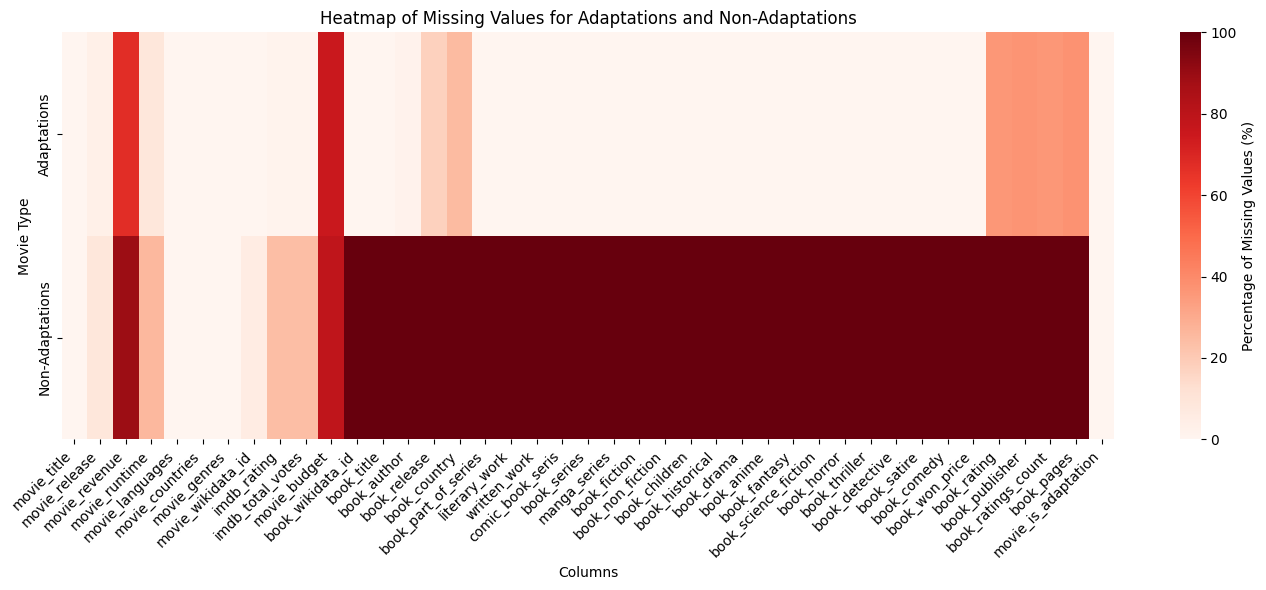

In [8]:
heatmap_missing_values(dataset)

We clearly see that the critical columns to handle are the movie revenue and movie budget. For the non adaptation movies, it is normal not to have informations related to books.

In [9]:
#Analyzing missing data over time

# Calculate the percentage of missing revenue and budget data by year
missing_revenue_by_year_adapt = proportion_missing_values(dataset, 'movie_revenue', 'movie_release', True)
missing_revenue_by_year_non_adapt= proportion_missing_values(dataset, 'movie_revenue', 'movie_release', False)
missing_budget_by_year_adapt = proportion_missing_values(dataset, 'movie_budget', 'movie_release', True)
missing_budget_by_year_non_adapt = proportion_missing_values(dataset, 'movie_budget', 'movie_release', False)


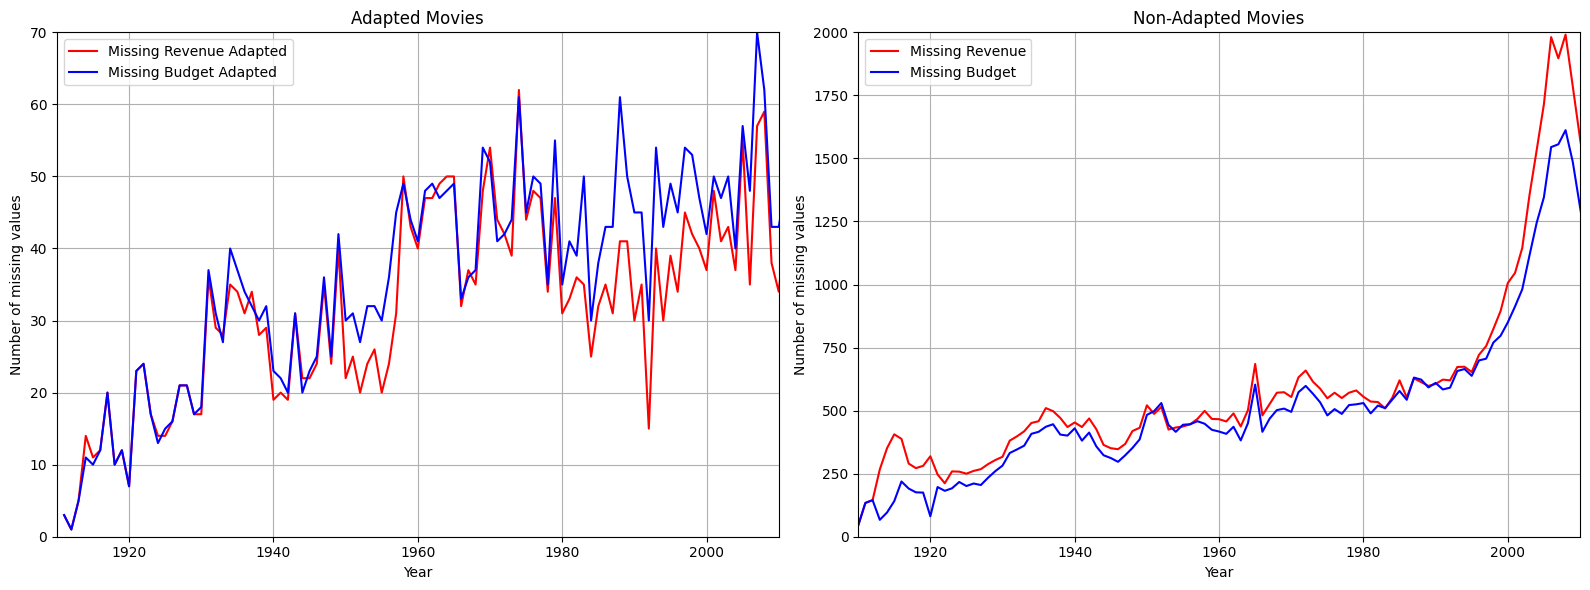

In [10]:
plot_missing_revenues_budget(missing_revenue_by_year_adapt,missing_budget_by_year_adapt,missing_revenue_by_year_non_adapt,missing_budget_by_year_non_adapt)

In [11]:
missing_budget_count = dataset['movie_budget'].isna().sum()
print(f"Number of missing values in 'movie_budget': {missing_budget_count}")

missing_budget_count = dataset['movie_revenue'].isna().sum()
print(f"Number of missing values in 'movie_revenue': {missing_budget_count}")

Number of missing values in 'movie_budget': 64287
Number of missing values in 'movie_revenue': 72086


## Handling movie revenue and movie budget
From what we can see, those 2 columns appear to have many missing values. In order to tackle this problem we fetched some more data about revenues using Wikidata. You can see how we proceeded on the data_extraction.ipynb notebook. The new dataframe is stored as books_and_movies.csv. We are going to do the same analysis on this new dataframe and see if we get some better results.

In [12]:
dataset_with_rev_budg = pd.read_csv('books_and_movies.csv')
dataset_with_rev_budg=dataset_with_rev_budg.drop_duplicates()

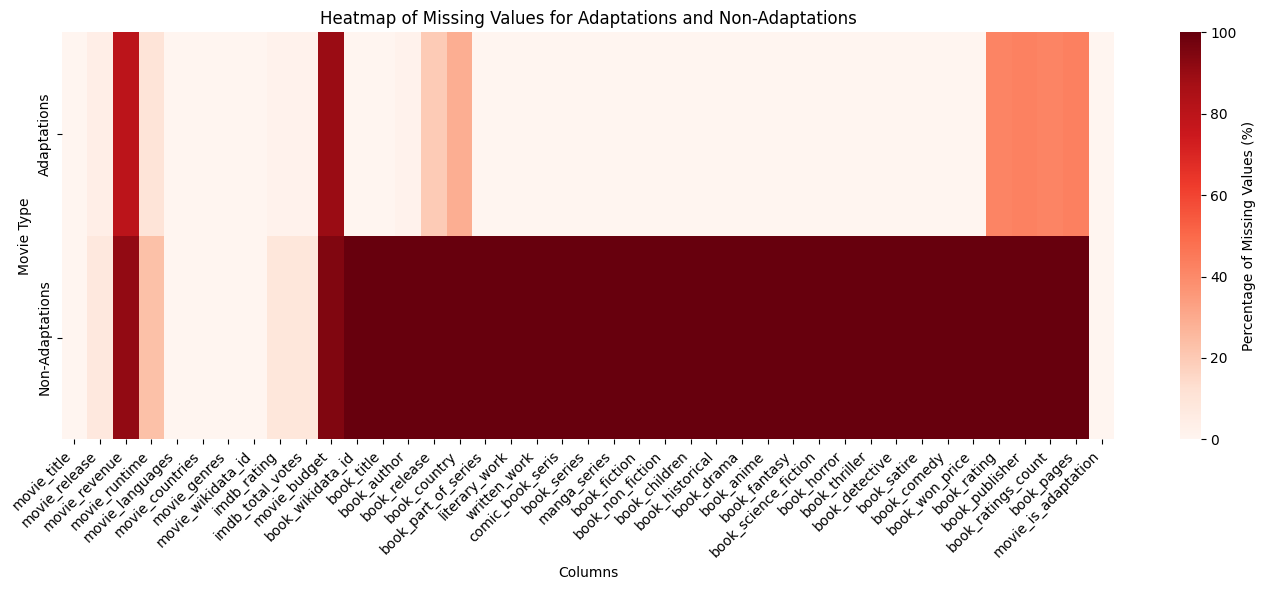

In [13]:
heatmap_missing_values(dataset_with_rev_budg)

In [14]:
missing_revenue_by_year_adapt_new = proportion_missing_values(dataset_with_rev_budg, 'movie_revenue', 'movie_release', True)
missing_revenue_by_year_non_adapt_new = proportion_missing_values(dataset_with_rev_budg, 'movie_revenue', 'movie_release', False)
missing_budget_by_year_adapt_new = proportion_missing_values(dataset_with_rev_budg, 'movie_budget', 'movie_release', True)
missing_budget_by_year_non_adapt_new = proportion_missing_values(dataset_with_rev_budg, 'movie_budget', 'movie_release', False)

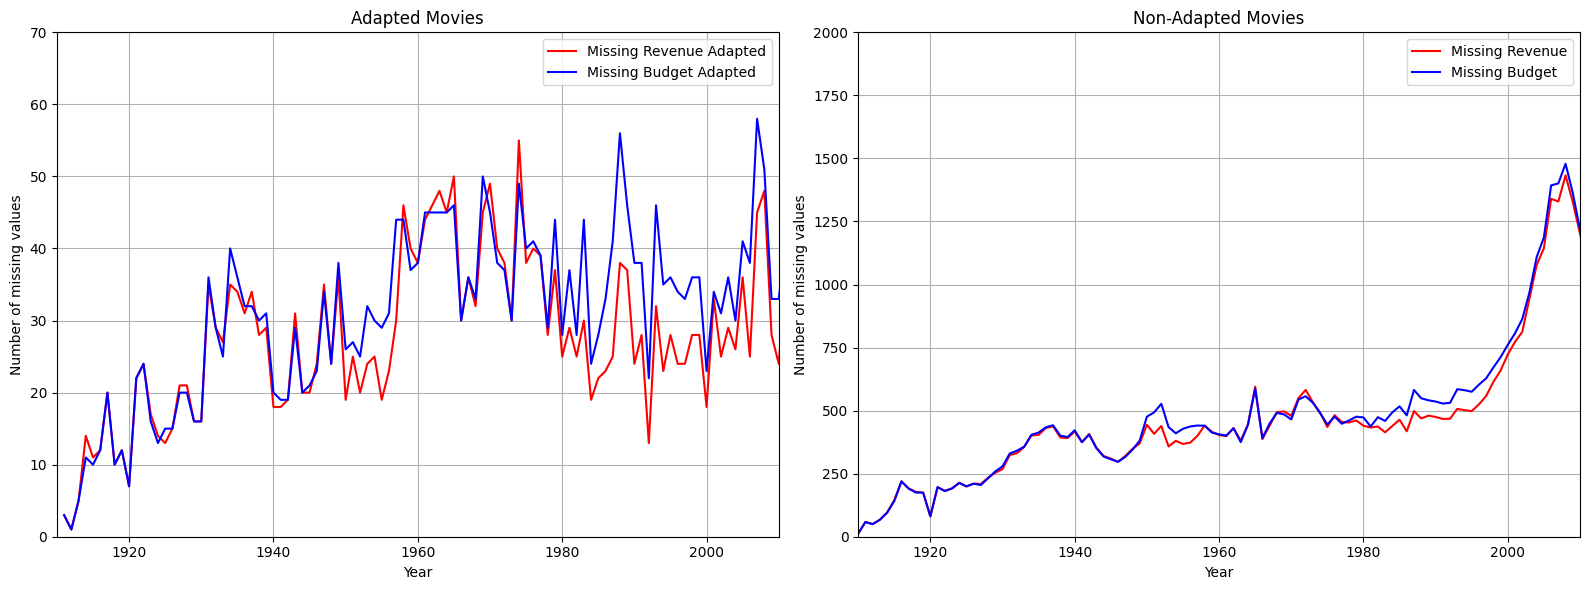

In [15]:
plot_missing_revenues_budget(missing_revenue_by_year_adapt_new,missing_budget_by_year_adapt_new,missing_revenue_by_year_non_adapt_new,missing_budget_by_year_non_adapt_new)

In [16]:
missing_budget_count = dataset_with_rev_budg['movie_budget'].isna().sum()
print(f"Number of missing values in 'movie_budget': {missing_budget_count}")

missing_budget_count = dataset_with_rev_budg['movie_revenue'].isna().sum()
print(f"Number of missing values in 'movie_revenue': {missing_budget_count}")

Number of missing values in 'movie_budget': 57149
Number of missing values in 'movie_revenue': 54694


We can see that we managed to reduce the number of NaN values. While still being significantly high, it forces us to find a solution about it when we will have to analyze these features. We cannot drop all the NaN values as the sample dataset will be too small to make accurate decisions.

Since we have managed to improve our dataset for the budget and revenue feature we are going to replace the corresponding columns with the new collected data.

In [17]:
dataset_merged = dataset.merge(
    dataset_with_rev_budg[['movie_wikidata_id', 'movie_revenue', 'movie_budget']],
    on='movie_wikidata_id',
    how='right',
    suffixes=('', '_df2')
)

dataset_merged['movie_revenue'] = dataset_merged['movie_revenue_df2']
dataset_merged['movie_budget'] = dataset_merged['movie_budget_df2']

dataset_merged = dataset_merged.drop(columns=['movie_revenue_df2', 'movie_budget_df2'])

dataset= dataset_merged

## Imputation using RandomForests to handle NA's for movie_revenue and movie_budget

### Why RF ? 

### Feature selection : correlation analysis to select relevant features

In [ ]:
numerical_features = [feature for feature in dataset.columns if is_numerical_feature(dataset, feature)]

In [ ]:
print(numerical_features)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
numerical_features = [feature for feature in dataset.columns if is_numerical_feature(dataset, feature)]
numerical_dataset = dataset[numerical_features]
correlation_matrix = numerical_dataset.corr()

# Increase the figure size for better readability
plt.figure(figsize=(20, 16))

# Plot the correlation matrix
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",  # Display correlation coefficients with two decimal places
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot_kws={"size": 8}  # Set font size for annotations
)

# Rotate the x and y-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title('Correlation Matrix of the Dataset')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()



For movie_budget : 
We can observe 

In [ ]:
# Step 2: Correlation between movie_budget and boolean features
bool_features = [feature for feature in dataset.columns if is_boolean_feature(dataset, feature)]
bool_corr = {feature: pointbiserialr(dataset['movie_budget'].dropna(), dataset[feature].dropna())[0] for feature in bool_features}

# Step 3: Visual distribution analysis for list-like features (e.g., genres)
list_features = ['movie_genres']  # Add other list features as needed

# Plot distribution of movie_budget for different genres
for feature in list_features:
    plt.figure(figsize=(10, 6))
    data_exploded = dataset.explode(feature)
    data_exploded.boxplot(column='movie_budget', by=feature)
    plt.title(f'Distribution of movie_budget by {feature}')
    plt.suptitle('')
    plt.xlabel(feature)
    plt.ylabel('movie_budget')
    plt.xticks(rotation=90)
    plt.show()

# Display results


print("\nStep 2: Correlation between movie_budget and boolean features:")
print(bool_corr)

In [ ]:
# Feature selection: choosing relevant columns for training
# Dropping columns that are less likely to be predictive of budget or revenue, such as movie titles and non-numerical identifiers
#Also droped book_pages and book_ratings_count, book_rating as they themselves contain a rather high % of NAs
relevant_features = [
    'imdb_rating', 'imdb_total_votes', 'movie_runtime', 'movie_genres', 
    'movie_languages', 'movie_countries', 'movie_is_adaptation'
]

In [ ]:
# Filtering data to include only relevant features and target columns
data_for_imputation = dataset[relevant_features + ['movie_budget', 'movie_revenue']]
len(data_for_imputation)

In [ ]:
# Dropping rows where all the selected relevant features are missing
data_for_imputation = data_for_imputation.dropna(subset=relevant_features, how='all')
len(data_for_imputation)

In [ ]:
missing_values_imputation = proportion_missing_values_all_dataset(data_for_imputation, relevant_features)

In [ ]:
print(missing_values_imputation)

In [ ]:
#Categorical encoding of relevant features 
#movie_languages

# Encode 'movie_languages' as English (1) or Other (0)
data_for_imputation['movie_languages_encoded'] = data_for_imputation['movie_languages'].apply(
    lambda x: 1 if 'English' in str(x) else 0
)

# Check the distribution of the encoded 'movie_languages' column
language_distribution_after = data_for_imputation['movie_languages_encoded'].value_counts(normalize=True)

# Display the distribution for context
language_distribution_after

In [ ]:
#movie_genres

from collections import Counter

# Split the genres by ';' and count each unique genre
genre_counts = Counter(
    genre.strip() for genres in data_for_imputation['movie_genres'].dropna()
    for genre in (genres if isinstance(genres, list) else genres.split(';')
))

# Identify the top 5 most common genres
top_genres = [genre for genre, _ in genre_counts.most_common(5)]

print(top_genres)

In [ ]:
# Create binary columns for each top genre
for genre in top_genres:
    genre_name = genre.replace(" ", "_").replace("/", "_")
    data_for_imputation[f'is_{genre_name}'] = data_for_imputation['movie_genres'].apply(
        lambda x: 1 if genre in (x if isinstance(x, list) else str(x).split(';')) else 0
    )

# Display the distribution of the top encoded genres
genre_distributions = data_for_imputation[[f'is_{genre.replace(" ", "_").replace("/", "_")}' for genre in top_genres]].sum()

# Show the distribution of encoded genres
print("Top genres and their distributions:")
print(genre_distributions)

In [ ]:
#movie_countries

# Flatten the lists and count each unique country
country_counts = Counter(
    country.strip() for countries in data_for_imputation['movie_countries'].dropna()
    for country in (countries if isinstance(countries, list) else countries.strip('[]').split(','))
)

# Identify the top 5 most common countries
top_countries = [country for country, _ in country_counts.most_common(5)]

# Create binary columns for each top country
for country in top_countries:
    country_name = country.replace(" ", "_").replace("/", "_")
    data_for_imputation[f'is_{country_name}'] = data_for_imputation['movie_countries'].apply(
        lambda x: 1 if country in (x if isinstance(x, list) else str(x).strip('[]').split(',')) else 0
    )

# Display the distribution of the top encoded countries
country_distributions = data_for_imputation[[f'is_{country.replace(" ", "_").replace("/", "_")}' for country in top_countries]].sum()

# Show the distribution of encoded countries
print("Top countries and their distributions:")
print(country_distributions)

In [ ]:
data_for_imputation.head()

In [ ]:
data_for_imputation = data_for_imputation.drop(columns=['movie_genres', 'movie_languages', 'movie_countries'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features and target columns for 'movie_budget'
X_budget = data_for_imputation.drop(columns=['movie_budget', 'movie_revenue'])
y_budget = data_for_imputation['movie_budget']

# Split the data into training and testing sets for 'movie_budget'
X_train_budget, X_test_budget, y_train_budget, y_test_budget = train_test_split(
    X_budget.loc[y_budget.notnull()], y_budget.dropna(), test_size=0.2, random_state=42
)

# Train the Random Forest Regressor for 'movie_budget'
rf_budget = RandomForestRegressor(n_estimators=100, random_state=42)
rf_budget.fit(X_train_budget, y_train_budget)

# Define features and target columns for 'movie_revenue'
y_revenue = data_for_imputation['movie_revenue']

# Split the data into training and testing sets for 'movie_revenue'
X_train_revenue, X_test_revenue, y_train_revenue, y_test_revenue = train_test_split(
    X_budget.loc[y_revenue.notnull()], y_revenue.dropna(), test_size=0.2, random_state=42
)

# Train the Random Forest Regressor for 'movie_revenue'
rf_revenue = RandomForestRegressor(n_estimators=100, random_state=42)
rf_revenue.fit(X_train_revenue, y_train_revenue)

# Display training completion message
print("Random Forest models for 'movie_budget' and 'movie_revenue' trained successfully.")


# Handling outliers
Based on the statistical description of the dataset performed earlier, we can see that outliers values are present only for the runtime features.

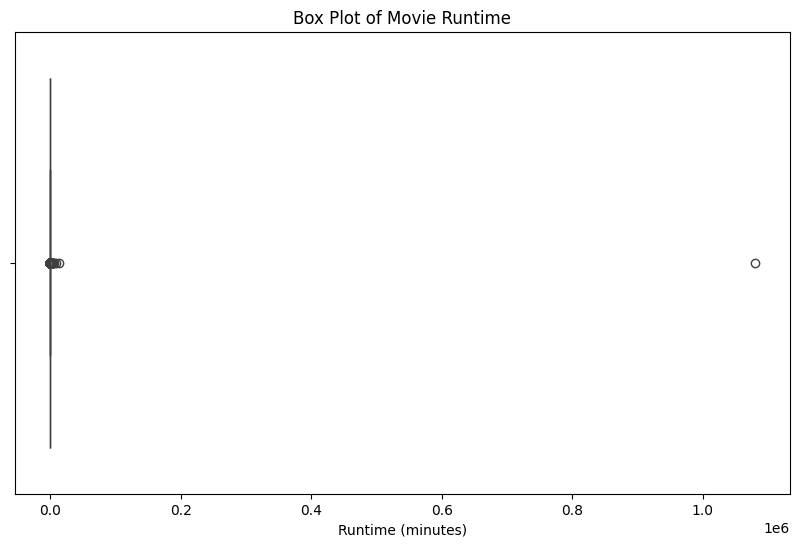

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['movie_runtime'])
plt.title('Box Plot of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.show()

In [19]:
# We searched for the longest movie existing and it appeared to be 240h long so 14400 min
threshold = 14400

# Identify high outliers
high_outliers = dataset[dataset['movie_runtime'] > threshold]
print("Number of high outliers using percentile:", high_outliers.shape[0])
print("High outliers:\n", high_outliers['movie_runtime'])

#Deletion of the outlier from the dataset
dataset=dataset.drop(high_outliers.index)

Number of high outliers using percentile: 1
High outliers:
 9641    1079281.0
Name: movie_runtime, dtype: float64


In [20]:
dataset.to_csv('dataset_intermediary.csv')

# Movies based on books proportion

In [ ]:
# Calculate the counts of adapted vs non-adapted movies
adapted_counts = dataset['movie_is_adaptation'].value_counts()
labels = ['Not Adapted', 'Adapted']

# Plot the donut chart
plt.figure(figsize=(4, 4))
plt.pie(adapted_counts, labels=labels, autopct='%1.1f%%', colors=['#8B0000', '#6a737b'], startangle=90, wedgeprops=dict(width=0.3))
plt.title('Percentage of Adapted vs Non-Adapted Movies')
plt.show()


Adapted movies represent quite a small proportion of our dataset. This low value may limit the scope of certain conclusions or analyses. One way to handle that would be to balance the data. 

# Balance Data

# Observe and handle the distributions 

For the numerical values, it is important to see how is the distribution and if it is needed to apply some kind of transformation. We're here considering :movie_revenue, movie_budget, imdb_rating, book_rating, book_pages

In [ ]:

def plot_histograms(df, columns):
    """
    Plot histograms for given columns in a DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    columns (list): List of column names for which to plot histograms.
    """
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(10, 6))
            sns.histplot(df[column].dropna(), kde=True, bins=30, color='blue')

            

            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(axis='y', linestyle='--', linewidth=0.5)
            plt.show()
        else:
            print(f"Column '{column}' not found in the DataFrame.")

# List of columns to plot
columns_to_plot = ['movie_revenue', 'movie_budget', 'imdb_rating', 'book_rating', 'book_pages']

# Call the function with your dataset and column list
plot_histograms(dataset, columns_to_plot)


The movie revenues and movie budget show 2 heavy tails distributions. A solution one could think of would be to use the log of the values.

In [ ]:
from scipy.stats import skew

skewness_revenue = dataset['movie_revenue'].skew()
skewness_budget=dataset['movie_budget'].skew()
print(f"Skewness of movie_revenue: {skewness_revenue}")
print(f"Skewness of movie_budget: {skewness_budget}")

## VOIR SI LE FAIRE SUR DATASET OU PAS??

In [ ]:
np.log10()

# Feature engineering 

We may consider creating some features that will later serve for our analysis

In [ ]:
# Time gap between movie release and book relase
dataset['time_gap'] = dataset['movie_release'] - dataset['book_release']

#measure profitability of a movie
dataset['revenue_budget_ratio'] = dataset['movie_revenue'] / dataset['movie_budget']
